In [19]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

### **Reading images**
By default, the imread function reads images in the BGR (Blue-Green-Red) format. We can read images in different formats using extra flags in the imread function:

cv2.IMREAD_COLOR: Default flag for loading a color image

cv2.IMREAD_GRAYSCALE: Loads images in grayscale format

cv2.IMREAD_UNCHANGED: Loads images in their given format, including the alpha channel. Alpha channel stores the transparency information – the higher the value of alpha channel, the more opaque is the pixel

**Pixel ranges from 0 to 255** 

In [19]:
image=cv2.imread("pic2.webp") # images reads in BGR format
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image=image+50
cv2.imshow('Added pixel image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

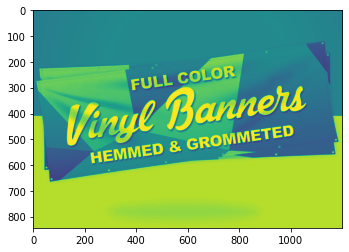

In [14]:
image=cv2.imread("pic1.webp") # images reads in BGR format
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# cv2.imshow('Image',image)
# cv2.waitKey(0) #=> window closes after 5 sec
# cv2.destroyAllWindows() #=> destroy windows
plt.imshow(image_gray)

In [17]:
# Shape
image.shape # 1200 x 844 px


(844, 1200, 3)

### **Resizing Images**
Images can be easily scaled up and down using OpenCV. This operation is useful for training deep learning models when we need to convert images to the model’s input shape. Different interpolation and downsampling methods are supported by OpenCV, which can be used by the following parameters:

INTER_NEAREST: Nearest neighbor interpolation

INTER_LINEAR: Bilinear interpolation

INTER_AREA: Resampling using pixel area relation

INTER_CUBIC: Bicubic interpolation over 4×4 pixel neighborhood

INTER_LANCZOS4: Lanczos interpolation over 8×8 neighborhood

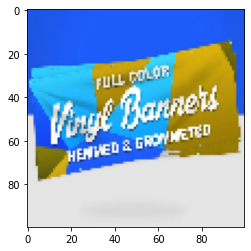

In [19]:
#converting image to size (100,100,3) 
smaller_image = cv2.resize(image,(100,100)) # 100 x 100 px
cv2.imwrite('pic3.webp',smaller_image)
plt.imshow(smaller_image) 

### **Color Channels**
**b,g,r=cv2.split(image):** Splits images into BGR channels

### **Shapes**

In [25]:
blank=np.ones((500,500),dtype='uint8')
# rectangle=cv2.rectangle(blank,(100,100),(300,300),256,-1)
# circle=cv2.circle(blank,(200,300),30,256,-1)
ellipse=cv2.ellipse(blank,(250,250),(250,200),0,0,90,256,-1)
cv2.imshow('Blank Image',ellipse)
cv2.waitKey(0)
cv2.destroyAllWindows()

### **Rotation Of Image**

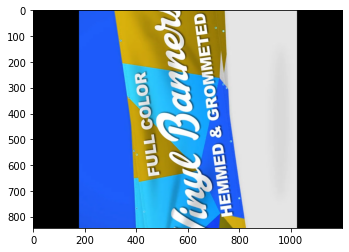

In [28]:
rows,cols=image.shape[:2]
# Center coordinate of imgage in cols/2,rows/2
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) #(coordinate=,angle=,scale=)
rot_img=cv2.warpAffine(image,M,(cols,rows))
plt.imshow(rot_img)

### **Image Translation**
Image translation is a geometric transformation that maps the position of every object in the image to a new location in the final output image. After the translation operation, an object present at location (x,y) in the input image is shifted to a new position (X,Y):

                                    X = x + dx

                                    Y = y + dy

Here, dx and dy are the respective translations along different dimensions.

Image translation can be used to add shift invariance to the model, as by tranlation we can change the position of the object in the image give more variety to the model that leads to better generalizability which works in difficult conditions i.e. when the object is not perfectly aligned to the center of the image.

This augmentation technique can also help the model correctly classify images with partially visible objects.This translation function is typically used in the image pre-processing stage.
**+x --> Move image to right side** 

**+y --> Move image to up side**

**-x --> Move image to left side**

**-y --> Move image to down** 


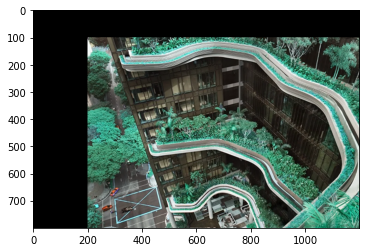

In [21]:
image=cv2.imread("pic2.webp") # images reads in BGR format
def transform(img,x,y):
    transmatrix=np.float32([[1,0,x],[0,1,y]])
    dimensions=(image.shape[1],image.shape[0])
    return cv2.warpAffine(img,transmatrix,dimensions)
    
image_trans=transform(image,200,100)
# cv2.imshow('Trnasformed image',image_trans)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(image_trans)

### **Flipping**
**Flip Code:**

0 -> Vertical Flip

1 -> Horizontal

-1 -> Vertical and Horizontal

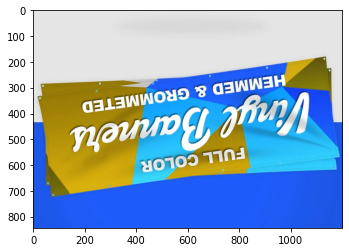

In [23]:
img=cv2.imread('pic1.webp')
flip_img=cv2.flip(img,-1)
plt.imshow(flip_img)

### **Crop**

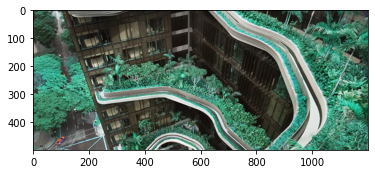

In [33]:
# crop=image[100:600,50:300,2]
crop=image[100:600]
plt.imshow(crop)

### **Histogram Compting**
Visualises the distribution of intensities of pixel

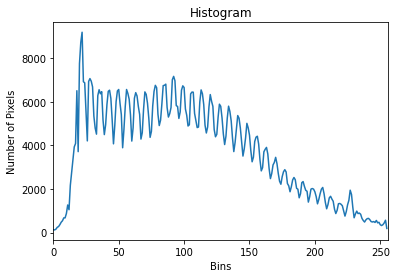

In [6]:
image=cv2.imread("pic2.webp") # images reads in BGR format
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
hist=cv2.calcHist([image_gray],[0],None,[256],[0,256])
plt.figure()
plt.title('Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of Pixels')
plt.xlim([0,256])
plt.plot(hist)



### **Blurring**

In [4]:
image=cv2.imread("pic2.webp") # images reads in BGR format
cv2.imshow("Original Image",image)

# Averaging : Takes the average of surrounding pixels
avg_blur=cv2.blur(image,(3,3))
cv2.imshow("Avg Bluring",avg_blur)

# Guassian Blur : Tekes the average of (product of weights and surroundind pixels)
# Gaussian Blur is less bluurer that avg. blur but this is natural blur
gauss=cv2.GaussianBlur(image,(7,7),0)
cv2.imshow("Gaussian Image",gauss)

# Median Blur : Pixel Takes the median of surrounding pixels
median=cv2.medianBlur(image,3)
cv2.imshow('Median Blur',median)

# Bilateral
bilateral=cv2.bilateralFilter(image,10,25,35)
cv2.imshow('Bilateral',bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()


### **Image Segmentation (Watershed Algorithm)**


### **Bitwise Operations**

In [6]:
zeroes=np.zeros((400,400),dtype='uint8') # Image of 400x400 with color black
rectangle=cv2.rectangle(zeroes.copy(),(50,110),(370,370),255,-1)
circle=cv2.circle(zeroes.copy(),(200,200),200,255,-1)

# cv2.imshow('Rectangle image',rectangle)
# cv2.imshow('Circle image',circle)
bitwise_or=cv2.bitwise_or(rectangle,circle)
bitwise_and=cv2.bitwise_and(rectangle,circle)
bitwise_xor=cv2.bitwise_xor(rectangle,circle)
bitwise_not=cv2.bitwise_not(rectangle)
cv2.imshow('bitwise OR',bitwise_or)
cv2.imshow('bitwise XOR',bitwise_xor)
cv2.imshow('bitwise AND',bitwise_and)
cv2.imshow('bitwise not',bitwise_not)
cv2.waitKey(0)
cv2.destroyAllWindows()
# plt.imshow(image_trans)


In [ ]:
image1=cv2.imread("pic2.webp")



### **Masking**

In [17]:
image=cv2.imread("pic2.webp") # images reads in BGR format
zeroes=np.zeros(image.shape[:2],dtype='uint8')
circle=cv2.circle(zeroes.copy(),(image.shape[1]//2,image.shape[0]//2),100,255,-1)
mask=cv2.bitwise_or(image,image,mask=circle)
cv2.imshow('Mask',mask)
cv2.imshow('Circle Image',circle)
cv2.imshow('Image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### **Edge Detection**

In [4]:
IMG=cv2.imread('pic2.webp')
GRAY_IMG=cv2.cvtColor(IMG,cv2.COLOR_BGR2GRAY)
cv2.imshow('IMAGE',GRAY_IMG)

# Laplacian
lap=cv2.Laplacian(GRAY_IMG,cv2.CV_64F)
lap=np.uint8(np.absolute(lap))
cv2.imshow('Laplacian Edge Detection',lap)


# Sobel
sobelx=cv2.Sobel(GRAY_IMG,cv2.CV_64F,1,0)
sobely=cv2.Sobel(GRAY_IMG,cv2.CV_64F,0,1)
combined_sobel=cv2.bitwise_or(sobelx,sobely)
# cv2.imshow('Sobel X',sobelx)
# cv2.imshow('Sobel Y',sobely)
# cv2.imshow('Combined Sobel',combined_sobel)


# Canny
canny=cv2.Canny(GRAY_IMG,125,170)
cv2.imshow('Canny Edge DEtection',canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

### **Image Filtering**

### **Image Contours**


### **Scale Invariant Feature Transform (SIFT)**


### **Speeded-Up Robust Features (SURF)**


### **Feature Matching**


### **Face Detection**